# Face mask detection with tensorflow

<img src="https://github.com/Mukhriddin19980901/Mask_detection/blob/main/pics/maskgif.gif?raw=true" width='400' height='400' />

## PLAN

- Import data

- Data preprocessing

- Model building

- Training 

- Testing

**Import data**

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import cvlib as cv
import glob
import os
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
def dataset(path):
    t=0
    x_train = []
    y_train = []
    for  i in range(3):
        labels = ['incorrect_mask','with_mask','without_mask']
        path_new = path + labels[i] + '/*'
        for image in glob.glob(path_new):
            image = cv2.imread(image)
            t+=1
            image = cv2.resize(image,(128,128))
            x_train.append(image)
            if i==0:
                y_train.append([1,0,0])
            elif i==1:
                y_train.append([0,1,0])
            else:
                y_train.append([0,0,1])
    return x_train,y_train
train_dir = r'datasets/maska/train/'
test_dir = r'datasets/maska/test/'

**Data preprocessing**

In [7]:
x_train = []
y_train = []
x_train,y_train= dataset(train_dir)
x_train = np.array(x_train)
y_train = np.array(y_train)
print(x_train.shape, y_train.shape)
x_test = []
y_test = []
x_test,y_test= dataset(test_dir)
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_test.shape)

(9512, 128, 128, 3) (9512, 3)
(669, 128, 128, 3)


In [17]:
y_train[0]

array([1, 0, 0])

In [41]:
labels = []
for y in y_train:
  # the labels are one-hot encoded
  labels.append(np.argmax(y))
count = [labels.count([0]),labels.count([1]),labels.count([2])]
classes = ['incorrect_mask','with_mask','without_mask']

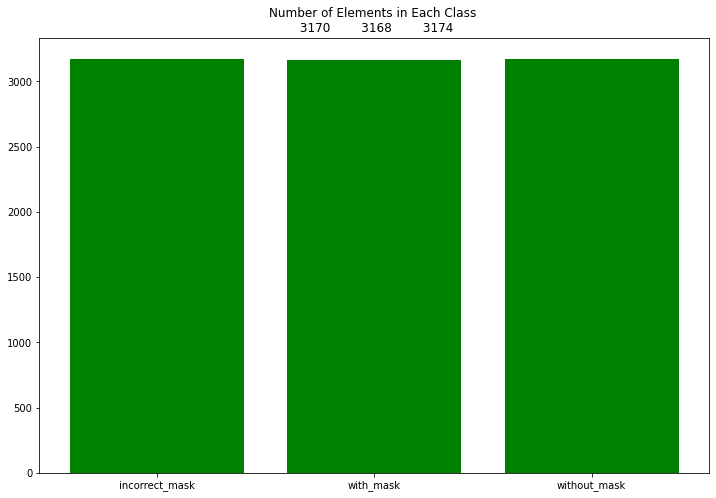

In [45]:
count
plt.figure(figsize=(12,8))
plt.bar(classes,count, color='green')
plt.title(f'Number of Elements in Each Class \n {count[0]}        {count[1]}        {count[2]}')
plt.show()

**Model training** 

In [3]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3) ,activation='relu' ,input_shape=(128,128,3)),
    keras.layers.MaxPooling2D((3,3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(32,activation = 'relu'),
    
    keras.layers.Dense(3,activation = 'softmax'),
])
optim = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=optim,loss='categorical_crossentropy',metrics=['accuracy'])
with tf.device("/GPU:0"):
    model2=model
    model2.fit(x_train,y_train,epochs=10)
    model2.evaluate(x_test,y_test)
    model2.summary()

Epoch 1/10
298/298 [==============================] - 12s 10ms/step - loss: 0.4465 - accuracy: 0.83722s - loss: 0.5869 - ac - ETA: 1s - loss: 0.5444 - accura - ETA: 1s - loss: 0.5163 -  - ETA: 0s
Epoch 2/10
298/298 [==============================] - 3s 11ms/step - loss: 0.2451 - accuracy: 0.9130
Epoch 3/10
298/298 [==============================] - 3s 10ms/step - loss: 0.1648 - accuracy: 0.9406A: 0s -
Epoch 4/10
298/298 [==============================] - 3s 10ms/step - loss: 0.1101 - accuracy: 0.9622 0s - loss: 0.1132 - accura
Epoch 5/10
298/298 [==============================] - 3s 10ms/step - loss: 0.0795 - accuracy: 0.9717
Epoch 6/10
298/298 [==============================] - 3s 10ms/step - loss: 0.0652 - accuracy: 0.9772
Epoch 7/10
298/298 [==============================] - 3s 10ms/step - loss: 0.0685 - accuracy: 0.9763 2s - loss: 0 - ETA: 1s - loss: 0.0583 -  - ETA: 0s - loss: 0.0644 - accura - ETA: 0s - loss: 0.0646 - accu - ETA: 0s - loss: 0.0682 - accuracy: 0.97
Epoch 8/10
298/

In [26]:
model2.save('maska_detection.model',save_format='h5')

**Test**

In [4]:
model2 = keras.models.load_model('maska_detection.model')

In [3]:
faces = ['wrong_mask','mask','no_mask']

while video.isOpened():
    _,image = video.read()
    face = cv.detect_face(image)
    for (x,y,w,h) in face:
        yuz_np = np.copy(image[y:h,x:w])
        if yuz_np.shape[0]<10 or yuz_np.shape[1]<10:
            continue
        yuz_np = cv2.resize(yuz_np,(128,128))
        yuz_np = np.expand_dims(yuz_np,0)
        bashorat = model2.predict(yuz_np)
        index=np.argmax([bashorat])
        face = faces[index]
    
        if face=='mask':
            color = (0,255,0)
        elif face== "wrong_mask" : 
            color = (255,130,0)
        else:
            color = (0,0,255)
        if index:
            face = f'{face} :  {np.around((1-bashorat[0][0])*100,2)} %'
        else:
            face = f'{face} : {np.around((bashorat[0][0]*100),2)} %'
        if y-10>10:
            Y=y-10
        else:
            Y=y+10        
        cv2.rectangle(image,(x,y),(w,h),color,2)
        cv2.putText(image,face,(x,Y),cv2.FONT_HERSHEY_COMPLEX,0.7,color,2)
            
    cv2.imshow("mask_detection",image)
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break
video.release()
cv2.destroyAllWindows()"

<img src="https://github.com/Mukhriddin19980901/Mask_detection/blob/main/pics/mask.png?raw=true" width='400' height='400' /><img src="https://github.com/Mukhriddin19980901/Mask_detection/blob/main/pics/wrong_mask.png?raw=true" width='400' height='400' />
